# Titanic Passenger Data Analysis

## By Henry Yu, 2017 

### Who died on the titanic? 

The titanic dataset is a classic dataset found on kaggle.com(https://www.kaggle.com/c/titanic/data) for machine learning practice and data analysis / visualization learning. 

Who died on the titanic? An analysis on the survivors and deaths on the titanic. We will explore whether gender, family size, departure location and other factor impact the survival of passengers. Which factors are most important in predicting survival and which factors are unrelated? 

In [32]:
# import python libraries and datasets 

import pandas as pd 
import numpy as mp 
import matplotlib as plt 
%matplotlib inline 

from pandas import Series, DataFrame 

In [37]:
plt.figure

<module 'matplotlib.figure' from '/Users/HenryYu/anaconda/lib/python2.7/site-packages/matplotlib/figure.pyc'>

In [6]:
df = pd.read_csv(r'titanic_data.csv')

In [7]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### For the description on the table names, refer to the kaggle website(https://www.kaggle.com/c/titanic/data) 

There are numerous factors that impact the survival of the passengers. Out of the almost 900 passenger dataset, around a third of the total passengers survived. 

The factors of interest are Pclass (a representation of economic status), age, family size (from SibSp and Parch), Fare and Embarked. 

First, let's get an idea of how many of the passenger survived as well as their age and gender 

0    0.616162
1    0.383838
Name: Survived, dtype: float64

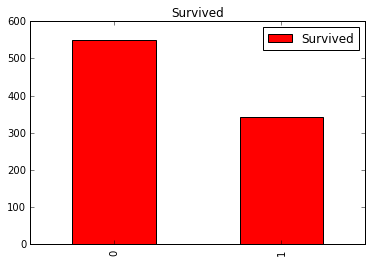

In [49]:
# % Percentage survived 
df.Survived.value_counts().plot(kind = 'bar', legend = True, color = 'red', subplots = True)
df.Survived.value_counts() / df.Survived.count()

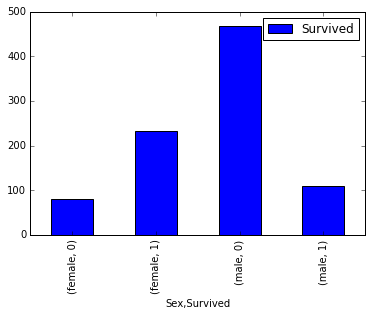

In [26]:
df.groupby('Sex').Survived.value_counts().sort_index().plot(kind = 'bar', legend = True)

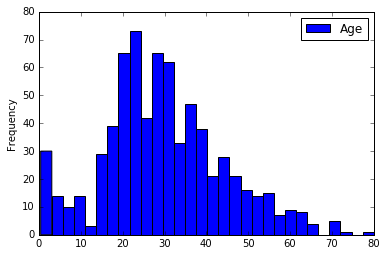

In [48]:
df.Age.plot(kind = 'hist', bins = 30, legend = True)

Overall, we observe around 60% of the passengers did not survive, while 300, or 38% of the passengers did. Of those 300 surviving passengers, the majority of those were female(200), with 100 surviving males. The majority of females survived, while the majority of males did not. 

It may be that during emergency evacuation procedures, women and children were given first priority to the emergency vessles. Furthermore, the males may have been more involved in the evacuation procedures and helping others get onto the lifesaving vessles first. In other scenerios, the male may have chosen to give up his spot for another, as was seen in the movie Titanic. 

Either way, lets investigate the gender and age of the survivors. 

Survived
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

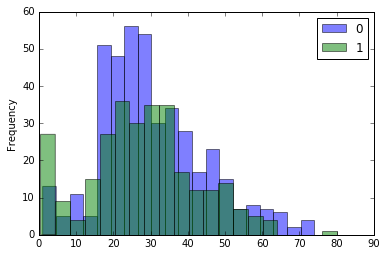

In [67]:
# age and gender survival analysis 
df.groupby(df.Survived).Age.plot(kind = 'hist', bins= 20, legend = True, alpha = 0.5)

As you can see, of the amount of people under 20, there were very little children and teenagers on board. The lowest was the number of children aged 13- 17, which would indicate that parents did not bring teens onto the trip. Most of the passengers had either very small children, or almost adult teenagers, who may have come on their own accord. 

### Children Survival 

If you take a look at the survival rate of those under 20, more young children survived in very category, as well as those from 10-15. From that age onwards, the number of deaths outnumber the number of survivors. This is further suggestion that children and young babies were prioritised, due to their high survival rate despite their lower chances for survival. 

### Male vs Female Survival

Sex
female    Axes(0.125,0.125;0.775x0.775)
male      Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

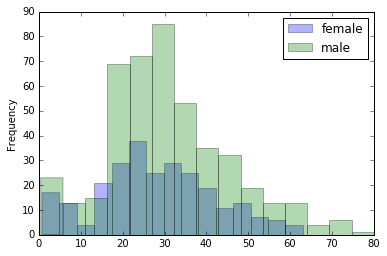

In [70]:
df.groupby(df.Sex).Age.plot(kind = 'hist', legend = True, alpha = 0.3, bins = 15)

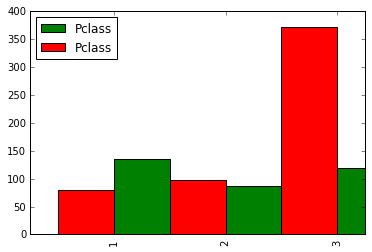

In [75]:
df.Pclass[df.Survived == 1].value_counts().sort_index().plot(kind = 'bar', color = 'green', position = 0, legend = True)
df.Pclass[df.Survived == 0].value_counts().sort_index().plot(kind = 'bar', color = 'red', position = 1, legend = True)

In [78]:
# male survival by ages 
age_bins = np.arange(0,90,10)

In [79]:
age_bins

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

In [81]:
# group by the ages 
df.Age.max()
# maximum age is 80

80.0

In [121]:
df_age = df.groupby(pd.cut(df['Age'], age_bins))

In [125]:
df_age.Survived 